# Samos Seismograms

Script adapted from https://github.com/fabian-kutschera/MAthesis/blob/main/Seismicity/Stations.ipynb

Data from https://github.com/fabian-kutschera/MAthesis/tree/main/Seismicity/data

In [1]:
from obspy import UTCDateTime
from obspy import read
from obspy import read_inventory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy 
import glob
import os

In [2]:
# use the IRIS DMC FDSNWS event Web Service to find more about the earthquake
samos_event = pd.read_csv("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/samos_event.dat", sep="|", skipinitialspace=True)
samos_event.columns = samos_event.columns.str.strip()
print(samos_event)

   #EventID                 Time  Latitude  Longitude  Depth/km    Author  \
0  11331986  2020-10-30T11:51:27   37.9175    26.7901      21.0  us,pt,at   

    Catalog Contributor                     ContributorID MagType  Magnitude  \
0  NEIC PDE          us  us7000c7y0,at00qj0jlr,pt20304000     mww        7.0   

  MagAuthor           EventLocationName  
0        us  DODECANESE ISLANDS, GREECE  


In [3]:
# Beachball using https://www.globalcmt.org and select north-dipping fault plane
focal_mechanism = dict(strike=276, dip=34, rake=-90, magnitude=samos_event["Magnitude"].iloc[0])
longitude_eq = samos_event["Longitude"].iloc[0]
latitude_eq = samos_event["Latitude"].iloc[0]
depth_eq = samos_event["Depth/km"].iloc[0] # km
starttime_eq = UTCDateTime(samos_event["Time"].iloc[0])

In [4]:
# Needed for real seismograms
codes = ["0905", "0911", "0916", "0917", "0918", "0919", "0920", "0921", "3516", "3528", 
         "3538", "3539", "4506", "4507", "4806", "4807", "4808", "4809", "4814", "4817"]

In [5]:
# Needed for synthetic seismograms
afad_stations = pd.read_csv("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/receiverAFAD_all_info.csv", sep=" ")
afad_stations.head()

,Network,Code,Country,Longitude,Latitude,Place,x,y
0,TK,4817,Mugla,27.603100,37.240100,Gulluk,120016.920843,-55711.910255
1,TK,4814,Mugla,27.656700,37.399100,Selimiye,124508.743817,-38001.840570
2,TK,3516,Izmir,26.890700,38.370600,Guzelbahce,55967.755973,69051.820606
3,TK,4506,Manisa,28.123470,38.483110,Salihli,163407.377339,83004.502199
4,TK,921,Aydin,27.592227,37.874702,Germencik,118046.851596,14684.481627


## Plot AFAD seismograms

In [56]:
directory = "/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
filenames = "*_tdvms_N.mseed"
files = glob.glob(os.path.join(directory, filenames))

TK.0911..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.0916..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.0905..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.4808..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.4806..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.3516..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.3538..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.0921..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.0918..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.4507..HNZ | 2020-10-30T11:51:27.000000Z - 2020-10-30T11:52:47.000000Z | 100.0 Hz, 8001 samples
TK.3528..HNZ | 2020-

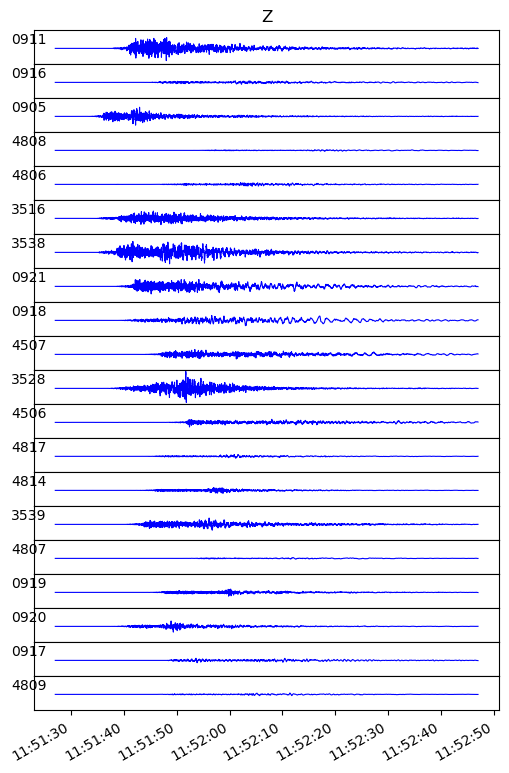

In [57]:
# raw accelerograms, unscaled, unfiltered
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(20, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
plot_ID = 0
component = 2 
# East: 0
# North: 1
# Z: 2

for f in files:
    st = read(f)
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    st.sort()  
    axs[plot_ID].plot(st[component].times("matplotlib"), st[component].data, "b-", linewidth=0.8)
    print(st[component])
    axs[plot_ID].xaxis_date()
    axs[plot_ID].set_ylabel(st[component].stats.station, rotation=0)
    if plot_ID == 0:
        channel_check = st[component].stats.channel
        if channel_check == "HNE":
            axs[plot_ID].set_title("E-W")
        elif channel_check == "HNN":
            axs[plot_ID].set_title("N-S")
        elif channel_check == "HNZ":
            axs[plot_ID].set_title("Z")
        else:
            axs[plot_ID].set_title("Sure?")
            
    else:
        if channel_check != st[component].stats.channel:
            print("ATTENTION!")
        else:
            pass
    plot_ID += 1
    
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

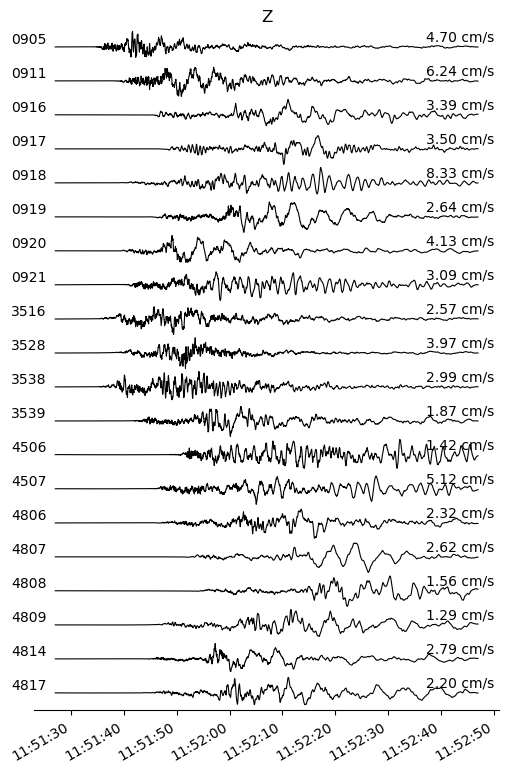

In [31]:
# scaled, unfiltered velocity seismograms - response removed 
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(20, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
component = 2 

# Directory set above
for f in files:
    st = read(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="VEL") # integrated
    tr = st[component].copy()
    index = codes.index(str(tr.stats.station))
    diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data))
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8)
    axs[index].text(x=.99, y=.99, s="{:.2f} cm/s".format(diff*100), ha='right', va='top', transform=axs[index].transAxes)
    axs[index].xaxis_date()
    axs[index].set_ylabel(tr.stats.station, rotation=0)
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W")
        elif channel_check == "HNN":
            axs[index].set_title("N-S")
        elif channel_check == "HNZ":
            axs[index].set_title("Z")
        else:
            axs[index].set_title("Sure?") 

axs[19].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

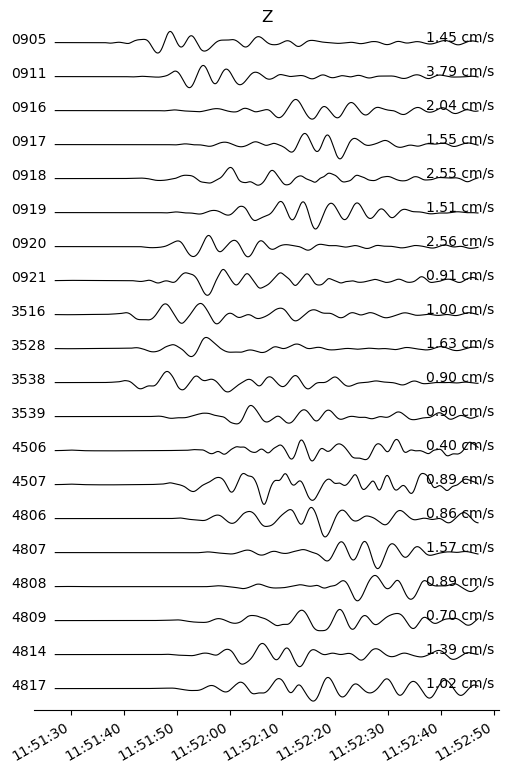

In [40]:
# scaled, filtered velocity seismograms - response removed 
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(20, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
component = 2 
freqmin=0.02 
freqmax=0.25
# Fra:  0.02, 0.15
# Taymaz: 0.02, 0.5 ?
# Taufiq: 0.1, 0.3

## observed data
#directory = "data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
#column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
#filenames = "*_tdvms_N.mseed"
#files = glob.glob(os.path.join(directory, filenames))
for f in files:
    st = read(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="VEL") # integrated
    st.filter("bandpass", freqmin=freqmin, freqmax=freqmax) # filter
    tr = st[component].copy()
    index = codes.index(str(tr.stats.station))
    #diff = max(tr.data) - min(tr.data)
    #diff = max(abs(tr.data))
    diff = max(tr.data)
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8)
    axs[index].text(x=.99, y=.99, s="{:.2f} cm/s".format(diff*100), ha='right', va='top', transform=axs[index].transAxes)
    axs[index].xaxis_date()
    axs[index].set_ylabel(tr.stats.station, rotation=0)
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W")
        elif channel_check == "HNN":
            axs[index].set_title("N-S")
        elif channel_check == "HNZ":
            axs[index].set_title("Z")
        else:
            axs[index].set_title("Sure?") 

axs[19].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

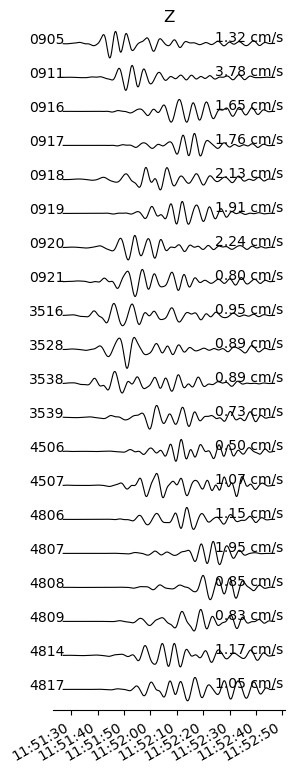

In [50]:
# scaled, filtered velocity seismograms - response removed 
fig = plt.figure(figsize=(3,10))
gs = fig.add_gridspec(20, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
component = 2 
freqmin=0.1
freqmax=0.3
# Fra:  0.02, 0.15
# Taymaz: 0.02, 0.5 ?
# Taufiq: 0.1, 0.3

## observed data
#directory = "data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
#column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
#filenames = "*_tdvms_N.mseed"
#files = glob.glob(os.path.join(directory, filenames))
for f in files:
    st = read(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="VEL") # integrated
    st.filter("bandpass", freqmin=freqmin, freqmax=freqmax, zerophase=True) # filter
    tr = st[component].copy()
    index = codes.index(str(tr.stats.station))
    #diff = max(tr.data) - min(tr.data)
    #diff = max(abs(tr.data))
    diff = max(tr.data)
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8)
    axs[index].text(x=.99, y=.99, s="{:.2f} cm/s".format(diff*100), ha='right', va='top', transform=axs[index].transAxes)
    axs[index].xaxis_date()
    axs[index].set_ylabel(tr.stats.station, rotation=0)
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W")
        elif channel_check == "HNN":
            axs[index].set_title("N-S")
        elif channel_check == "HNZ":
            axs[index].set_title("Z")
        else:
            axs[index].set_title("Sure?") 

axs[19].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

#fig.savefig("Samos/seismograms/test_NOzerophase.png", dpi=300)

## Ploting SeisSol synthetic seismograms

In [7]:
# Only codes with data
codes = ["0905", "0911", "0916", "0919", "0920", "3516", "3528", 
         "3538", "3539", "4506", "4507", "4808", "4814", "4817"]

/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00003-00172.dat
Found 3516 at index 5
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00023-00064.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00017-00173.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00008-00017.dat
Found 3528 at index 6
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00020-00080.dat
Found 0905 at index 0
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00002-00173.dat
Found 4814 at index 12
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00022-00111.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00011-00074.dat
Found 0911 at index 1
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL

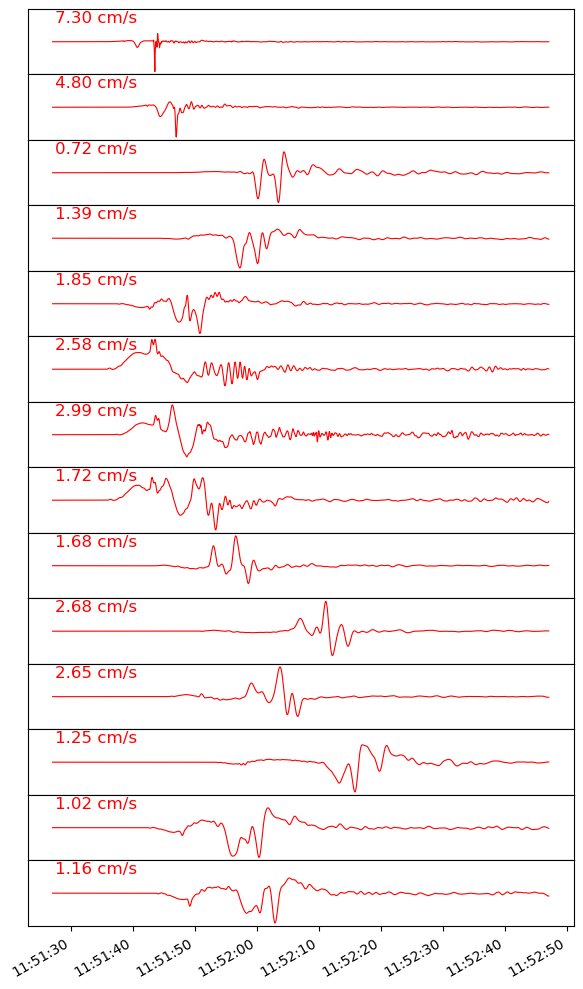

In [29]:
# scaled, unfiltered synthetic velocity seismograms 
model = "Model_C" # "Ryo_v3", "Fra_v4", "Model_C", "Model_D"
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(len(codes), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

seissol = "v2" # v1, v2, v3
#v1, v2, v3: ground velocities, x y and z components

component = int(seissol[-1]) - 1
# East: 0
# North: 1
# Z: 2

# syn data
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Model_C":
    filenames = "Fra_C_WL-receiver*.dat"
elif model == "Model_D":
    filenames = "Fra_D_WL-receiver*.dat"
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    #tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax) #unfiltered
    # scaling
    # diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes 
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "r-", linewidth=0.8, label="simulated")
    axs[index].text(x=.2, y=.99, s="{:.2f} cm/s".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes, color="red")
    axs[index].xaxis_date()

axs[len(codes)-1].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

plt.tight_layout()    

/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00003-00172.dat
Found 3516 at index 5
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00023-00064.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00017-00173.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00008-00017.dat
Found 3528 at index 6
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00020-00080.dat
Found 0905 at index 0
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00002-00173.dat
Found 4814 at index 12
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00022-00111.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00011-00074.dat
Found 0911 at index 1
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL

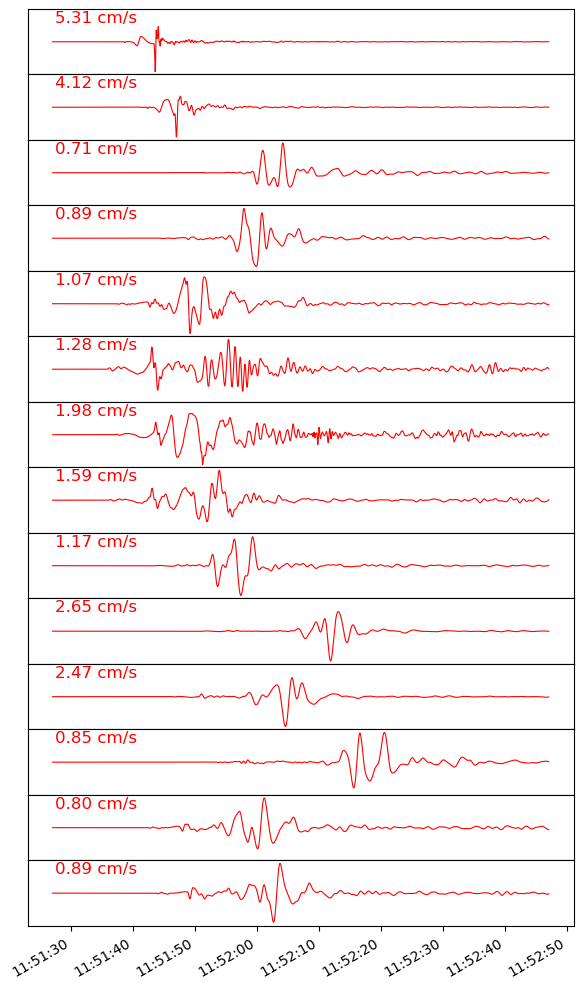

In [30]:
# scaled, filtered synthetic velocity seismograms 
model = "Model_C" # "Ryo_v3", "Fra_v4", "Model_C", "Model_D"
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(len(codes), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
freqmin=0.15
freqmax=5
#freqmin=0.02 
#freqmax=0.15 
# Fra:  0.02, 0.15

seissol = "v2" # v1, v2, v3
#v1, v2, v3: ground velocities, x y and z components

component = int(seissol[-1]) - 1
# East: 0
# North: 1
# Z: 2

# syn data
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Model_C":
    filenames = "Fra_C_WL-receiver*.dat"
elif model == "Model_D":
    filenames = "Fra_D_WL-receiver*.dat"
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes 
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "r-", linewidth=0.8, label="simulated")
    axs[index].text(x=.2, y=.99, s="{:.2f} cm/s".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes, color="red")
    axs[index].xaxis_date()

axs[len(codes)-1].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

plt.tight_layout()    

## Difference synthetic SeisSol seismograms with and without WL

/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00025-00181.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00012-00088.dat
Found 0916 at index 2
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00006-00088.dat
Found 0920 at index 4
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00014-00088.dat
Found 3539 at index 8
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00011-00143.dat
Found 0911 at index 1
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00027-00229.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00003-00184.dat
Found 3516 at index 5
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00024-00183.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-

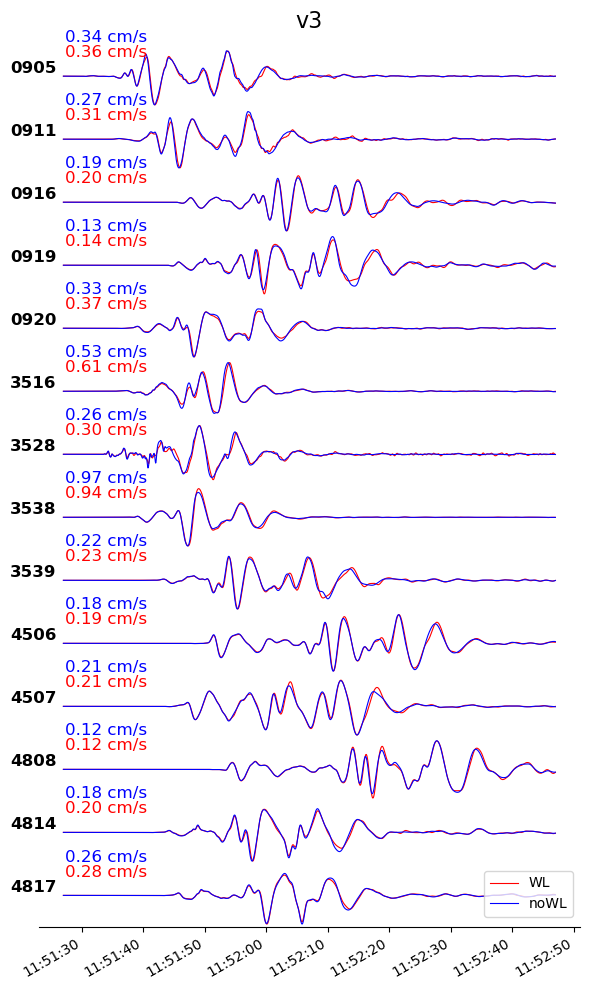

In [77]:
# scaled, filtered synthetic velocity seismograms 
model = "Fra_v4" # "Ryo_v3", "Fra_v4", 
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(len(codes), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
freqmin=0.15
freqmax=5
#freqmin=0.02 
#freqmax=0.15 
# Fra:  0.02, 0.15

seissol = "v3" # v1, v2, v3
#v1, v2, v3: ground velocities, x y and z components

component = int(seissol[-1]) - 1
# East: 0
# North: 1
# Z: 2

# syn data - WL
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_WL-receiver*.dat".format(model)
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes 
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "r-", linewidth=0.8, label="WL")
    axs[index].text(x=.2, y=.99, s="{:.2f} cm/s".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes, color="red")
    axs[index].xaxis_date()

# syn data - noWL
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_noWL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_noWL-receiver*.dat".format(model)
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes 
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "b-", linewidth=0.8, label="noWL")
    axs[index].text(x=.2, y=.99, s="{:.2f} cm/s".format(diff*100), fontsize=12, 
                    ha='right', va='bottom', transform=axs[index].transAxes, color="blue")
    axs[index].xaxis_date()
    
    #if seissol == "v2":
    axs[index].set_ylabel(tr.stats.station, rotation=0, fontsize=12, weight="bold")
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        axs[index].set_title(seissol, fontsize=16, pad=12)

axs[len(codes)-1].legend()

axs[len(codes)-1].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

plt.tight_layout()    
fig.savefig("Samos/seismograms/{}_seismograms_{}_{}-{}_WL_comparison.png".format(model,seissol,freqmin,freqmax),dpi=300)

/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00025-00181.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00012-00088.dat
Found 0916 at index 2
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00006-00088.dat
Found 0920 at index 4
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00014-00088.dat
Found 3539 at index 8
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00011-00143.dat
Found 0911 at index 1
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00027-00229.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00003-00184.dat
Found 3516 at index 5
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-receiver-00024-00183.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Fra_v4/Fra_v4_WL-

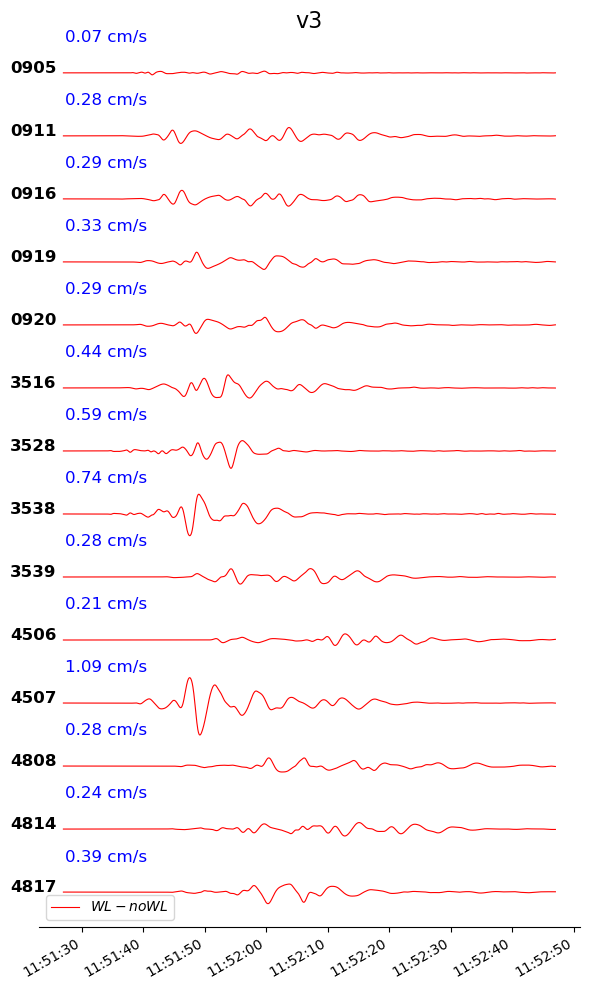

In [47]:
# difference of filtered synthetic velocity seismograms with and without WL
model = "Fra_v4" # "Ryo_v3", "Fra_v4", 
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(len(codes), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
freqmin=0.15
freqmax=1
#freqmin=0.02 
#freqmax=0.15 
# Fra:  0.02, 0.15

seissol = "v3" # v1, v2, v3
#v1, v2, v3: ground velocities, x y and z components

component = int(seissol[-1]) - 1
# East: 0
# North: 1
# Z: 2

trace_comparison = []
#trace_comparison = [None] * 14

# syn data - WL
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_WL-receiver*.dat".format(model)
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    #trace_comparison.append(tr.data)
    trace_comparison.insert(index, tr.data)

# syn data - noWL
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_noWL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_noWL-receiver*.dat".format(model)
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    trace_difference = tr.data - trace_comparison[index]
    axs[index].plot(tr.times("matplotlib"), trace_difference, "r-", linewidth=0.8, label=r"$WL - noWL$")
    axs[index].text(x=.2, y=.99, s="{:.2f} cm/s".format(max(abs(trace_difference))*100), fontsize=12, 
                    ha='right', va='bottom', transform=axs[index].transAxes, color="blue")
    axs[index].xaxis_date()
    
    #if seissol == "v2":
    axs[index].set_ylabel(tr.stats.station, rotation=0, fontsize=12, weight="bold")
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        axs[index].set_title(seissol, fontsize=16, pad=12)

axs[len(codes)-1].legend()

axs[len(codes)-1].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

plt.tight_layout()    

## Combined plot of synthetic SeisSol seismograms and observed seismograms

/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00003-00172.dat
Found 3516 at index 8
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00023-00064.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00017-00173.dat
Found 4807 at index 15
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00008-00017.dat
Found 3528 at index 9
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00020-00080.dat
Found 0905 at index 0
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00002-00173.dat
Found 4814 at index 18
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00022-00111.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_C/Fra_C_WL-receiver-00011-00074.dat
Found 0911 at index 1
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/M

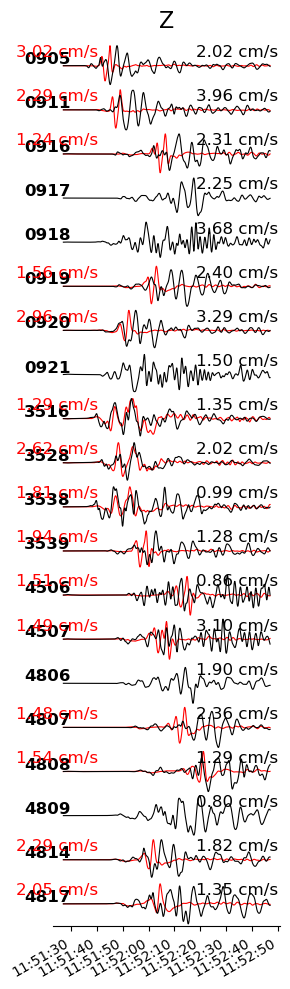

In [6]:
# scaled, filtered, real and synthetic velocity seismograms 
model = "Model_C" # "Ryo_v3", "Fra_v4", "Model_C", "Model_D"
fig = plt.figure(figsize=(3,10))
gs = fig.add_gridspec(len(codes), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
freqmin=0.02
freqmax=0.5
#freqmin=0.02 # 0.1
#freqmax=0.15 # 0.3
# Fra:  0.02, 0.15

seissol = "v3" # v1, v2, v3
#v1, v2, v3: ground velocities, x y and z components

component = int(seissol[-1]) - 1
# East: 0
# North: 1
# Z: 2

# syn data
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Model_C":
    filenames = "Fra_C_WL-receiver*.dat"
elif model == "Model_D":
    filenames = "Fra_D_WL-receiver*.dat"
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+80)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "r-", linewidth=0.8, label="simulated")
    axs[index].text(x=.2, y=.99, s="{:.2f} cm/s".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes, color="red")


# observed data
directory = "/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
filenames = "*_tdvms_N.mseed"
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    st = read(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="VEL")
    #st.detrend() # changes nothing
    tr = st[component].copy()
    print(tr)
    if str(tr.stats.station) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else:
        index = codes.index(str(tr.stats.station))
        print(str(tr.stats.station), index)
    # scaling
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8, label="observed")
    axs[index].text(x=.99, y=.99, s="{:.2f} cm/s".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes)
    axs[index].xaxis_date()
    #if seissol == "v2":
    axs[index].set_ylabel(tr.stats.station, rotation=0, fontsize=12, weight="bold")
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)

    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W", fontsize=16, pad=12)
        elif channel_check == "HNN":
            axs[index].set_title("N-S", fontsize=16, pad=12)
        elif channel_check == "HNZ":
            axs[index].set_title("Z", fontsize=16, pad=12)
            #axs[index].legend(loc="lower right", bbox_to_anchor=(1.01, 0.92), ncol=2) 
            #axs[index].legend(loc="lower right", bbox_to_anchor=(1.01, 1.04), ncol=2) # with pad=14
            #axs[index].legend(loc="upper right", ncol=2) 
            # reduziere ersten Wert für Legende weiter links
            # reduziere zweiten Wert für Legende mehr runter
        else:
            axs[index].set_title("Sure?") 

axs[len(codes)-1].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

plt.tight_layout()  
fig.savefig("Samos/seismograms/{}_seismograms_{}_{}-{}.png".format(model,seissol,freqmin,freqmax),dpi=300)

/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00021-00048.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00011-00126.dat
Found 0911 at index 1
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00022-00082.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00017-00130.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00026-00072.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00004-00131.dat
Found 4506 at index 9
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00023-00095.dat
Skipped
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00010-00130.dat
Found 0919 at index 3
/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/Model_D/Fra_D_WL-receiver-00008-00168.dat
Fou

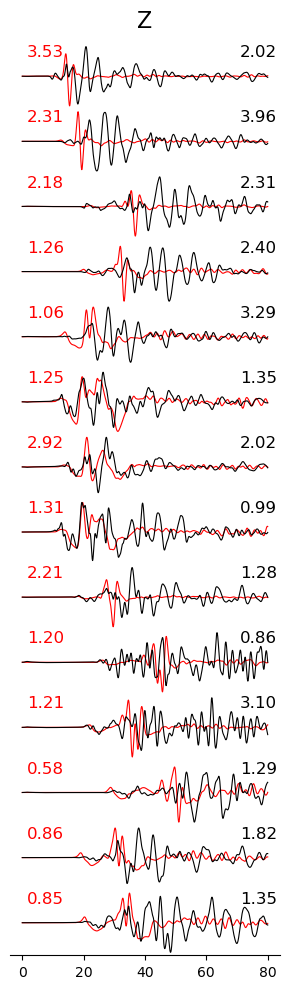

In [44]:
# scaled, filtered, real and synthetic velocity seismograms 
model = "Model_D" # "Ryo_v3", "Fra_v4", "Model_C", "Model_D"
fig = plt.figure(figsize=(3,10))
gs = fig.add_gridspec(len(codes), hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
trim_sec = 80 # s
freqmin=0.02
freqmax=0.5
#freqmin=0.02 # 0.1
#freqmax=0.15 # 0.3
# Fra:  0.02, 0.15

seissol = "v3" # v1, v2, v3
#v1, v2, v3: ground velocities, x y and z components

component = int(seissol[-1]) - 1
# East: 0
# North: 1
# Z: 2

# syn data
directory = "/Users/fkutschera/Documents/Data/Samos/Samos_seismograms/{}/".format(model)
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
if model == "Ryo_v3":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Fra_v4":
    filenames = "{}_WL-receiver*.dat".format(model)
elif model == "Model_C":
    filenames = "Fra_C_WL-receiver*.dat"
elif model == "Model_D":
    filenames = "Fra_D_WL-receiver*.dat"
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    # get coorindates
    print(f)
    coords = pd.read_csv(f, nrows=3, skiprows=2, header=None, sep="\s+")
    x1 = coords[2][0]
    x2 = coords[2][1]
    x3 = coords[2][2]
    df = {'x1': [x1], 'x2': [x2], 'x3': [x3]}
    coords = pd.DataFrame(df)
    # get data
    df_rec = pd.read_csv(f, skiprows=5, sep='\s+', names=column_names)
    df_rec.drop(columns=["xx","yy","zz","xy","yz","xz"], inplace=True)
    # merge to get station name
    n = 2
    coords.x1 = np.round(coords.x1, decimals=n)
    afad_stations.x = np.round(afad_stations.x, decimals=n)
    station = pd.merge(left=coords, right=afad_stations, left_on="x1", right_on="x", how="left")
    # check station code
    station["Code"] = station["Code"].apply(lambda x: '{0:0>4}'.format(x)) # make 4 digits
    if str(station["Code"].iloc[0]) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else: 
        index = codes.index(str(station["Code"].iloc[0]))
        print("Found {} at index {}".format(station["Code"].iloc[0], index))
    # convert to obspy
    data = df_rec[seissol].to_numpy()
    length = len(data)
    tr = obspy.core.Trace(data=data)   
    tr.stats.network = station["Network"].iloc[0]
    tr.stats.station = station["Code"].iloc[0]
    tr.stats.channel = seissol
    tr.stats.delta = df_rec["Time"].iloc[1] - df_rec["Time"].iloc[0]
    tr.stats.starttime = starttime_eq
    tr.trim(starttime=starttime_eq, endtime=starttime_eq+trim_sec)
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    # scaling
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes
    
    times = np.linspace(0, trim_sec, len(tr.data))
    axs[index].plot(times, tr.data/diff, "r-", linewidth=0.8, label="simulated")
    #axs[index].plot(tr.times("matplotlib"), tr.data/diff, "r-", linewidth=0.8, label="simulated")
    axs[index].text(x=.2, y=.99, s="{:.2f}".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes, color="red")


# observed data
directory = "/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
filenames = "*_tdvms_N.mseed"
files = glob.glob(os.path.join(directory, filenames))
for f in files:
    st = read(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+trim_sec);
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="VEL")
    #st.detrend() # changes nothing
    tr = st[component].copy()
    print(tr)
    if str(tr.stats.station) not in codes[:]:
        print("Skipped") # currently not necessary
        continue
    else:
        index = codes.index(str(tr.stats.station))
        print(str(tr.stats.station), index)
    # scaling
    tr.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) # scaled by peak amplitudes

    times = np.linspace(0, trim_sec, len(tr.data))
    axs[index].plot(times, tr.data/diff, "k-", linewidth=0.8, label="observed")
    #axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8, label="observed")
    axs[index].text(x=.99, y=.99, s="{:.2f}".format(diff*100), fontsize=12, 
                    ha='right', va='top', transform=axs[index].transAxes)
    #axs[index].xaxis_date()
    if seissol == "v2":
        axs[index].set_ylabel(tr.stats.station, rotation=0, fontsize=12, weight="bold")
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)

    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W", fontsize=16, pad=12)
        elif channel_check == "HNN":
            axs[index].set_title("N-S", fontsize=16, pad=12)
        elif channel_check == "HNZ":
            axs[index].set_title("Z", fontsize=16, pad=12)
            #axs[index].legend(loc="lower right", bbox_to_anchor=(1.01, 0.92), ncol=2) 
            #axs[index].legend(loc="lower right", bbox_to_anchor=(1.01, 1.04), ncol=2) # with pad=14
            #axs[index].legend(loc="upper right", ncol=2) 
            # reduziere ersten Wert für Legende weiter links
            # reduziere zweiten Wert für Legende mehr runter
        else:
            axs[index].set_title("Sure?") 

axs[len(codes)-1].spines['bottom'].set_visible(True)

axs[len(codes)-1].set_xticks([0, 20, 40, 60, 80])
#print(axs[len(codes)-1].get_xticks())
#axs[len(codes)-1].set_xticks([18565.49409722, 18565.4943287, 18565.49456019, 18565.49479167, 18565.49502315])
#fig.autofmt_xdate()

for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

plt.tight_layout()  
fig.savefig("Samos/seismograms/{}_seismograms_{}_{}-{}.png".format(model,seissol,freqmin,freqmax),dpi=300)

## Displacement ?

In [7]:
directory = "/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
filenames = "*_tdvms_N.mseed"
files = glob.glob(os.path.join(directory, filenames))

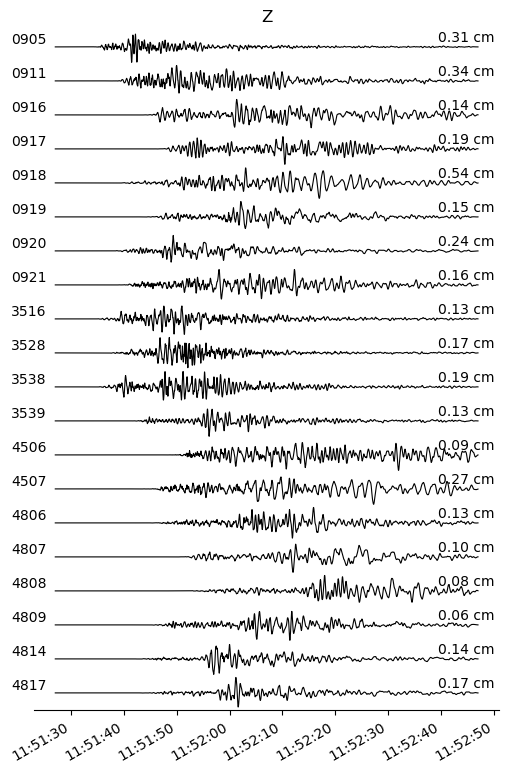

In [13]:
# scaled, unfiltered displacement seismograms - response removed 
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(20, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
component = 2 
# East: 0
# North: 1
# Z: 2

# Directory set above
for f in files:
    st = read(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="DISP") # twice integrated
    tr = st[component].copy()
    index = codes.index(str(tr.stats.station))
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) 
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8)
    axs[index].text(x=.99, y=.99, s="{:.2f} cm".format(diff*100), ha='right', va='top', transform=axs[index].transAxes)
    axs[index].xaxis_date()
    axs[index].set_ylabel(tr.stats.station, rotation=0)
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W")
        elif channel_check == "HNN":
            axs[index].set_title("N-S")
        elif channel_check == "HNZ":
            axs[index].set_title("Z")
        else:
            axs[index].set_title("Sure?") 

axs[19].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])

/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/0911_tdvms_N.mseed
0911
1
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/0916_tdvms_N.mseed
0916
2
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/0905_tdvms_N.mseed
0905
0
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/4808_tdvms_N.mseed
4808
16
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/4806_tdvms_N.mseed
4806
14
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/3516_tdvms_N.mseed
3516
8
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/3538_tdvms_N.mseed
3538
10
/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/0921_tdvms_N.mseed
0921

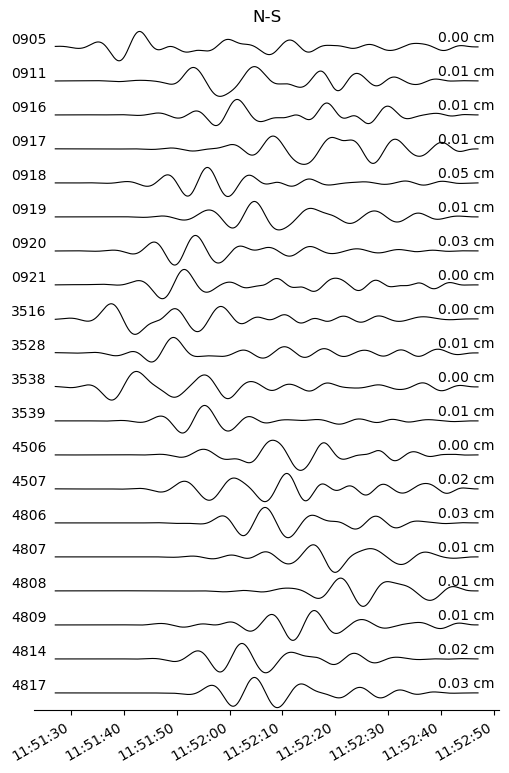

In [24]:
# scaled, filtered displacement seismograms - response removed 
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(20, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
component = 1 
freqmin=0.02 #0.03
freqmax=0.15 #1
# Fra:  0.02, 0.15

## observed data
#directory = "data/TDVMS_174566_FTVgUTYpvkUQmoSjWhZchvlhP/"
#column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]
#filenames = "*_tdvms_N.mseed"
#files = glob.glob(os.path.join(directory, filenames))
for f in files:
    st = read(f)
    print(f)
    st.sort()
    st.trim(starttime=starttime_eq, endtime=starttime_eq+80);
    print(st[component].stats.station)
    inv = read_inventory("/Users/fkutschera/Documents/GitHub/MAthesis/Seismicity/data/TDVMS_174574_dAdRLDsDJyCkUtrfL/{}_N_station.xml".format(str(st[component].stats.station)))
    st.remove_response(inventory=inv, output="DISP") # twice integrated
    st.filter("bandpass", freqmin=freqmin, freqmax=freqmax, zerophase=True) # filter
    tr = st[component].copy()
    index = codes.index(str(tr.stats.station))
    print(index)
    #diff = max(tr.data) - min(tr.data)
    diff = max(abs(tr.data)) 
    axs[index].plot(tr.times("matplotlib"), tr.data/diff, "k-", linewidth=0.8)
    axs[index].text(x=.99, y=.99, s="{:.2f} cm".format(diff*100), ha='right', va='top', transform=axs[index].transAxes)
    axs[index].xaxis_date()
    axs[index].set_ylabel(tr.stats.station, rotation=0)
    axs[index].spines['top'].set_visible(False)
    axs[index].spines['right'].set_visible(False)
    axs[index].spines['bottom'].set_visible(False)
    axs[index].spines['left'].set_visible(False)
    if index == 0:
        channel_check = tr.stats.channel
        if channel_check == "HNE":
            axs[index].set_title("E-W")
        elif channel_check == "HNN":
            axs[index].set_title("N-S")
        elif channel_check == "HNZ":
            axs[index].set_title("Z")
        else:
            axs[index].set_title("Sure?") 

axs[19].spines['bottom'].set_visible(True)
fig.autofmt_xdate()
for ax in axs:
    ax.label_outer()
    ax.get_yaxis().set_ticks([])